<a href="https://colab.research.google.com/github/muhammadessam02/Laptop_Price_Prediction/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Dataset

    1- Company- String -Laptop Manufacturer
    2- Product -String -Brand and Model
    3- TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
    4- Inches -Numeric- Screen Size
    5- ScreenResolution -String- Screen Resolution
    6- Cpu- String -Central Processing Unit (CPU)
    7- Ram -String- Laptop RAM
    8- Memory -String- Hard Disk / SSD Memory
    9- GPU -String- Graphics Processing Units (GPU)
    10- OpSys -String- Operating System
    11- Weight -String- Laptop Weight
    12- Price_euros -Numeric- Price (Euro)

### Notebook content
   -  Importing Libraries and Loading Data.
   -  Data Cleaning and Data Preprocessing.
   - Exploratory Data Analysis EDA .
   - Model Building .

Importing Libraries

In [1]:
import io
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving laptop_price.csv to laptop_price.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['laptop_price.csv']))


In [4]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


Data Cleaning and Data Preprocessing

- First, I want to change column names to lowercase, for easier writing.

In [5]:
df = df.rename(columns=str.lower)

- I have an index number for each laptop, I do not need the laptop _id column, so I will drop it.

In [6]:
df=df.drop('laptop_id', axis=1)

I will check for any duplicate data.

In [7]:
df[df.duplicated()]

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,729.00
1276,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,459.00
1277,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,289.00
1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,379.00
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,899.00
1280,HP,Pavilion 15-AW003nv,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,549.99
1281,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,805.99
1282,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.00
1283,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32
1284,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00


- There are duplicates I want to drop them

In [8]:
df=df.drop_duplicates()

- I will check null values in each column

In [ ]:
df.isnull().sum()

company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

There is no null values

### Dealing with screen resolution column

In [9]:
df["screenresolution"].head(10)

0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
5                              1366x768
6    IPS Panel Retina Display 2880x1800
7                              1440x900
8                     Full HD 1920x1080
9           IPS Panel Full HD 1920x1080
Name: screenresolution, dtype: object

- From the 'screenresolution' column I can get the screen resolution ,if the screen is a touch screen or not, and if the screen is IPS Panel or not

In [10]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')

In [11]:
df['touch_screen'] = df['screenresolution'].str.extract(r'(Touchscreen)',re.IGNORECASE).fillna('NO')
df['touch_screen']=df['touch_screen'].replace("Touchscreen","Yes")

In [12]:
df['IPS Panel_screen'] = df['screenresolution'].str.extract(r'(IPS Panel)',re.IGNORECASE).fillna('No')
df['IPS Panel_screen']=df['IPS Panel_screen'].replace("IPS Panel","Yes")

In [13]:
df['IPS Panel_screen'].value_counts()

No     918
Yes    357
Name: IPS Panel_screen, dtype: int64

- Now let's drop the 'screenresolution' column .

In [14]:
df = df.drop('screenresolution', axis=1)

### Dealing with RAM and Weight columns
- We need to remove BG and kg so we can change columns' data type to float


In [15]:
df['ram'] = df['ram'].str.replace('GB', '')
df['weight'] = df['weight'].str.replace('kg', '')

In [16]:
df['ram']=df['ram'].astype(int)
df['weight']=df['weight'].astype(float)

## Dealing with CPU column

In [17]:
df['cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: cpu, Length: 118, dtype: int64

- We need to extract the CPU freq and CPU brand into separate columns

In [18]:
df['cpu_frq(GHz)']=df['cpu'].str.extract(r"(\d+(?:\.\d+)\s*GHz)")

df['cpu_frq(GHz)']=df['cpu_frq(GHz)'].str.replace("GHz","")
df['cpu_frq(GHz)']=df['cpu_frq(GHz)'].astype(float)

In [19]:
df['cpu_brand']=df['cpu'].str.extract(r"^([\w\-]+)")


## Dealing with memory column

In [20]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        124
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

- First I should convert all the units to GB

In [21]:
df['memory']=df['memory'].str.replace('2TB','2000GB')
df['memory']=df['memory'].str.replace('1.0TB','1TB', regex=True)
df['memory']=df['memory'].str.replace('1TB','1000GB')

- Some laptops have two memory (two hard disk ). I will split the column into four columns (type and capacity) for each memory.

In [22]:
df[['memory1_type','memory2_type']]=df['memory'].str.split('+', expand=True)

In [23]:
df['memory2_type'].value_counts()

  1000GB HDD       185
  2000GB HDD        15
  256GB SSD          3
  500GB HDD          2
  1000GB Hybrid      2
  512GB SSD          1
Name: memory2_type, dtype: int64

In [24]:
df['memory1_capacity']=df['memory'].str.extract(r"([\d. +-/]+)\s*GB")
df['memory1_type']=df['memory1_type'].str.replace(r"([\d. +-/]+)\s*GB", '', 
                                                  regex=True)

df['memory2_capacity']=df['memory2_type'].str.extract(r"([\d. +-/]+)\s*GB")
df['memory2_type']=df['memory2_type'].str.replace(r"([\d. +-/]+)\s*GB", '',
                                                  regex=True)

In [25]:
df['memory1_capacity']=df['memory1_capacity'].astype(float)
df['memory2_capacity']=df['memory2_capacity'].astype(float)

In [26]:
df["memory2_capacity"].value_counts()

1000.0    187
2000.0     15
256.0       3
500.0       2
512.0       1
Name: memory2_capacity, dtype: int64

In [27]:
df["memory2_capacity"]= df["memory2_capacity"].replace({'NaN': np.nan})
df["memory2_capacity"]= df["memory2_capacity"].fillna(0)

- Drop Memory Colum

In [28]:
df=df.drop(['memory'], axis=1)

## Dealing with gpu column

In [29]:
df['gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: gpu, Length: 110, dtype: int64

- I want to extract the GPU brand into a separate column.

In [30]:
df["gpu_brand"]=df['gpu'].str.extract(r"^([\w\-]+)")

### Dealing with opsys column
- I want to replace (Windows 10, Windows 10 S, and Windows 7 ) with Windows. 
- mac OS X with macOS .

In [31]:
df['opsys']=df['opsys'].replace({'Windows 10' : 'Windows', 
                                 'Windows 10 S' : 'Windows', 
                                 'Windows 7' : 'Windows', 
                                 'Mac OS X' : 'macOS' }) 

### Exploratory Data Analysis EDA

In [32]:
sns.set(rc={"axes.facecolor":"#FAF3FC","figure.facecolor":"#FAF3FC",
            'figure.figsize':(14,5)})

pallet = ["#998289","#9981A0","#F5B7B1","#F9E79F"]

#### Manufacturing and Type

Text(0.5, 1.0, 'Laptop Price by Company')

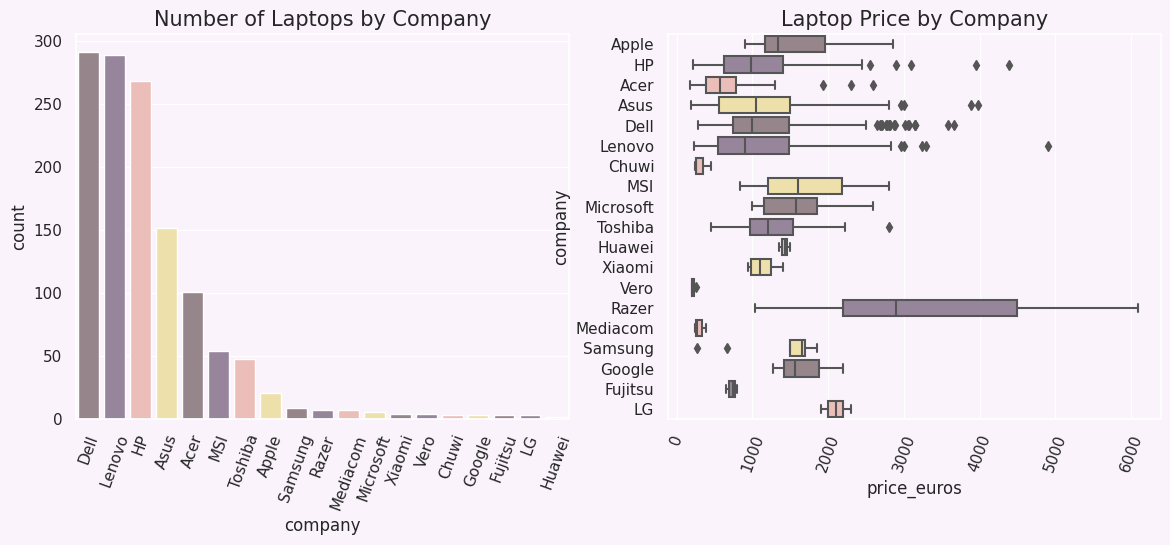

In [33]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="company",ax=axes[0],palette=pallet,data=df,
              order=df["company"].value_counts().index)

sns.boxplot(x ='price_euros',y ="company" ,palette=pallet,data = df)

axes[0].set_title("Number of Laptops by Company",fontsize=15)
axes[1].set_title("Laptop Price by Company",fontsize=15)

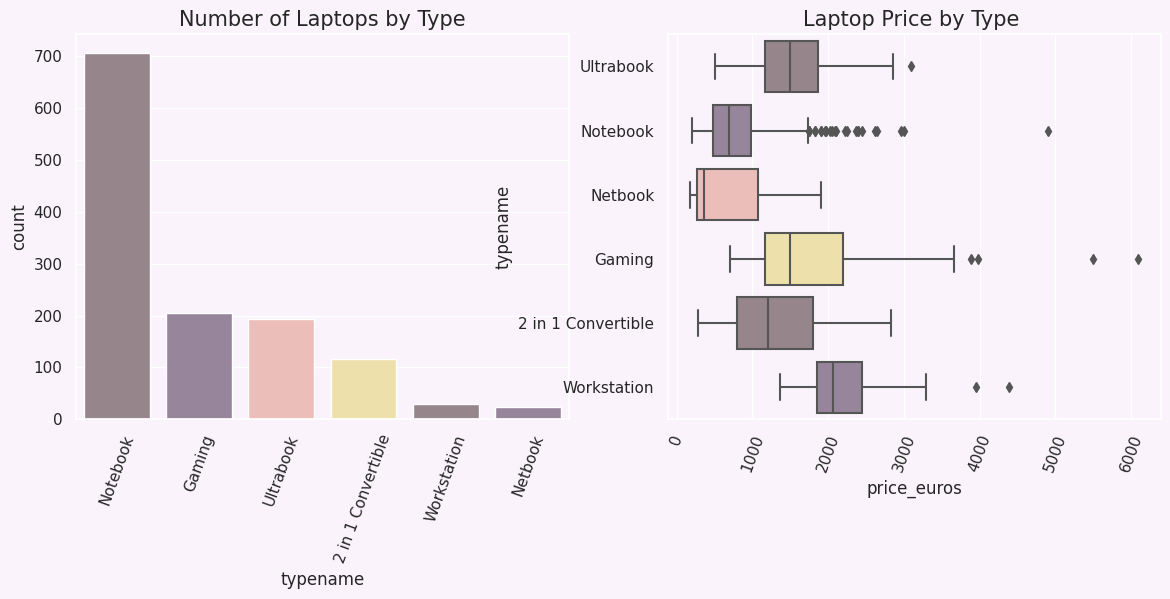

In [34]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="typename",ax=axes[0],palette=pallet,data=df,
              order=df["typename"].value_counts().index)

sns.boxplot(x ='price_euros',y ="typename" ,ax=axes[1],palette=pallet,data = df)

axes[0].set_title("Number of Laptops by Type",fontsize=15)
axes[1].set_title("Laptop Price by Type ",fontsize=15)
plt.show()

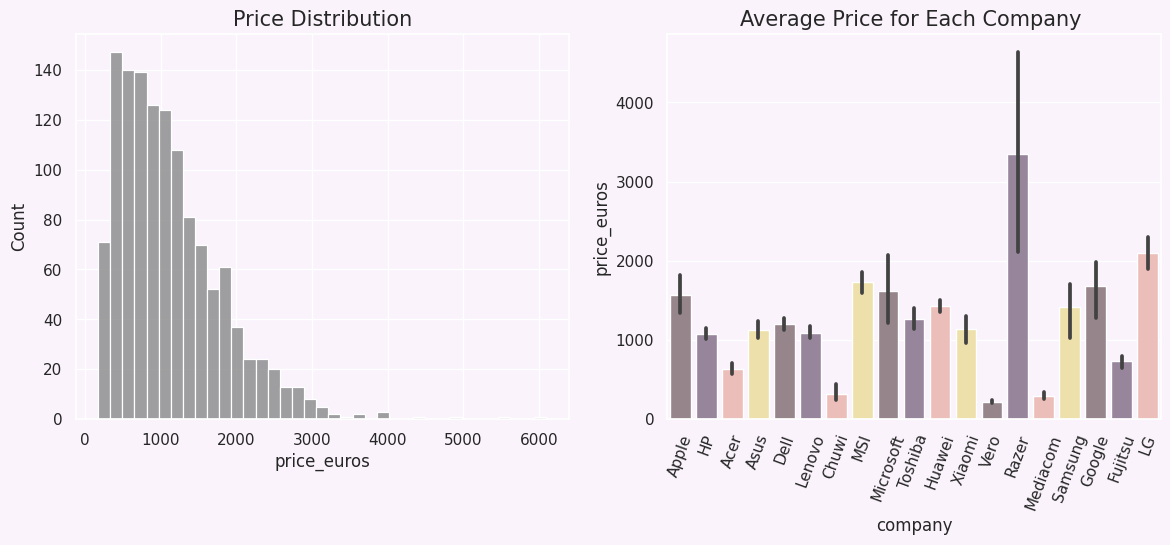

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.histplot(x="price_euros",ax=axes[0],color="grey",data=df)
sns.barplot(x="company",y='price_euros',estimator=np.mean,
            ax=axes[1],palette=pallet,data=df)
plt.xticks(rotation=70)
axes[0].set_title("Price Distribution",fontsize=15)
axes[1].set_title("Average Price for Each Company ",fontsize=15)
plt.show()

- Dell, Lenovo, HP, Asus ,and Acer laptops are the most frequent in our dataset.
- Samsung, Razer, Mediacom, Microsoft, Xiaomi, Vero, Chuwi, Google, Fujitsu, and LG Huawei have less than 10 laptops in the dataset.
- Razer is the most expensive laptop (but we only have 7 razer laptops).
- Among the most frequent company in the dataset MSI laptops are on average the most expensive
- Laptops from Dell, Lenovo, HP, and Asus have, on average, a price of around 1000 euros.
- In general, Vero is the cheapest laptop on average in the dataset, and Acer is the cheapest among the most frequent ones.
- The price range is between 200 to 6000, but most laptops are less than 4000 .
- Notebook is the most frequent type.
- We have 6 types of laptops in the database, the most popular one is the notebook , and the least popular one is the netbook.
- Notebooks and netbooks have the lowest average price .

In [36]:
df[df["price_euros"]>4000]

,company,product,typename,inches,cpu,ram,gpu,opsys,weight,price_euros,resolution,touch_screen,IPS Panel_screen,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity,gpu_brand
196,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Nvidia GeForce GTX 1080,Windows,3.49,6099.0,3840x2160,Yes,No,2.9,Intel,SSD,None,1000.0,0.0,Nvidia
610,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,32,Nvidia Quadro M2200M,Windows,2.50,4899.0,3840x2160,NO,Yes,3.1,Intel,SSD,None,1000.0,0.0,Nvidia
749,HP,Zbook 17,Workstation,17.3,Intel Xeon E3-1535M v5 2.9GHz,16,Nvidia Quadro M2000M,Windows,3.00,4389.0,1920x1080,NO,Yes,2.9,Intel,SSD,None,256.0,0.0,Nvidia
830,Razer,Blade Pro,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Nvidia GeForce GTX 1080,Windows,3.49,5499.0,3840x2160,Yes,No,2.9,Intel,SSD,None,512.0,0.0,Nvidia


- We only have 4 laptops with prices above 4000, two from Razer, one from HP, and one from Lenovo.
- So prices above 4000 are outlier and I will drop them.

In [37]:
df[df["price_euros"]<4000]

,company,product,typename,inches,cpu,ram,gpu,opsys,weight,price_euros,resolution,touch_screen,IPS Panel_screen,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,NO,Yes,2.3,Intel,SSD,None,128.0,0.0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NO,No,1.8,Intel,Flash Storage,None,128.0,0.0,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NO,No,2.5,Intel,SSD,None,256.0,0.0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,NO,Yes,2.7,Intel,SSD,None,512.0,0.0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,NO,Yes,3.1,Intel,SSD,None,256.0,0.0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,1920x1080,Yes,Yes,2.5,Intel,SSD,None,128.0,0.0,Intel
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,3200x1800,Yes,Yes,2.5,Intel,SSD,None,512.0,0.0,Intel
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,1366x768,NO,No,1.6,Intel,Flash Storage,None,64.0,0.0,Intel
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,1366x768,NO,No,2.5,Intel,HDD,None,1000.0,0.0,AMD


## CPU, GPU, and Operating System

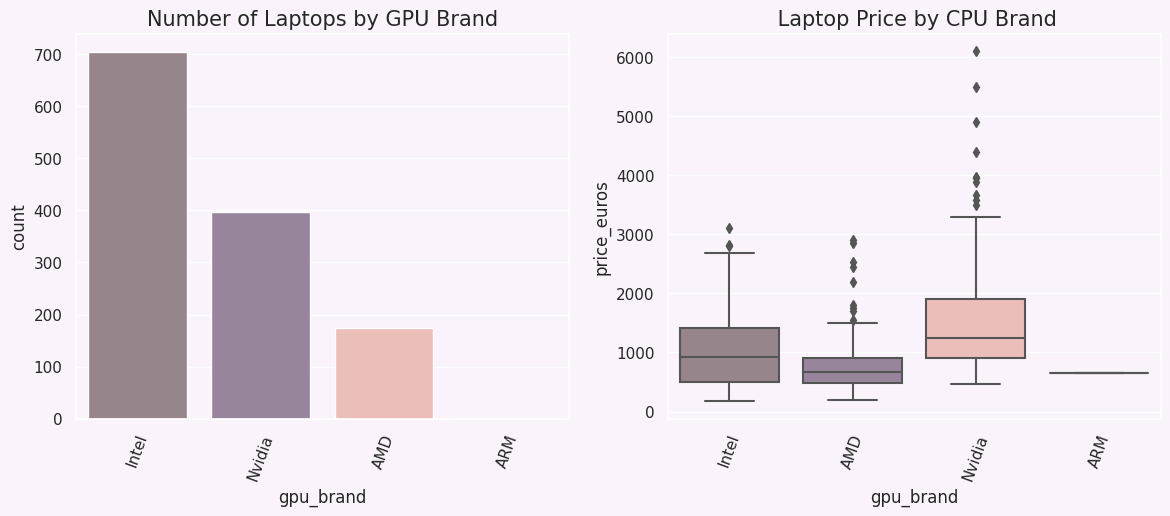

In [38]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="gpu_brand",ax=axes[0],palette=pallet,data=df,
              order=df["gpu_brand"].value_counts().index)
sns.boxplot(x ='gpu_brand',y ="price_euros" ,palette=pallet,ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by GPU Brand",fontsize=15)
axes[1].set_title(" Laptop Price by CPU Brand",fontsize=15)

plt.show()

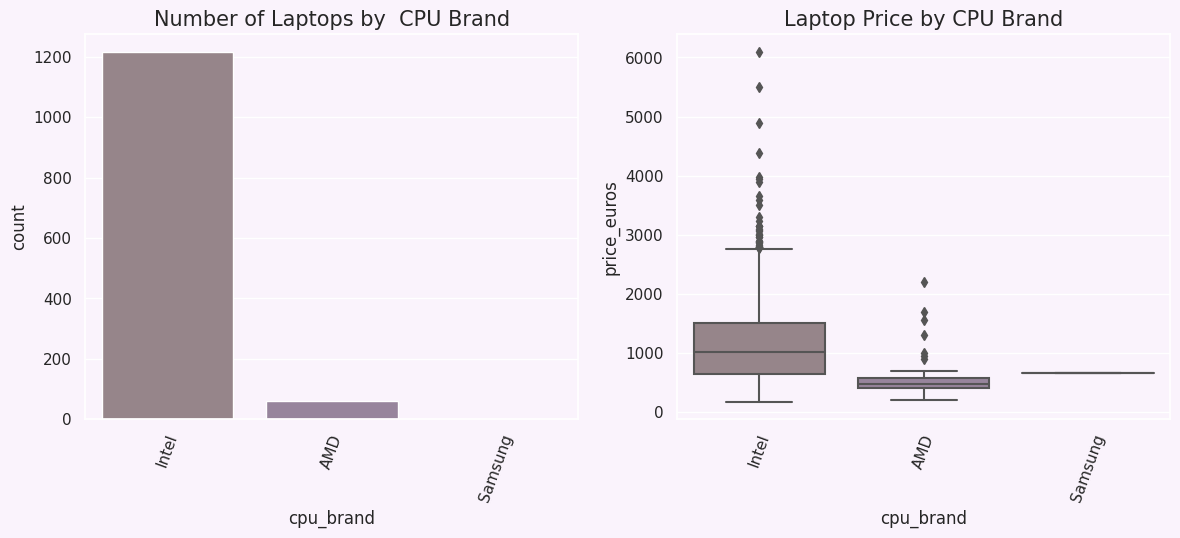

In [39]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="cpu_brand",ax=axes[0],palette=pallet,
              data=df,order=df["cpu_brand"].value_counts().index)
sns.boxplot(x ="cpu_brand",y ="price_euros" ,palette=pallet,ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by  CPU Brand",fontsize=15)
axes[1].set_title("Laptop Price by CPU Brand",fontsize=15)


plt.show()

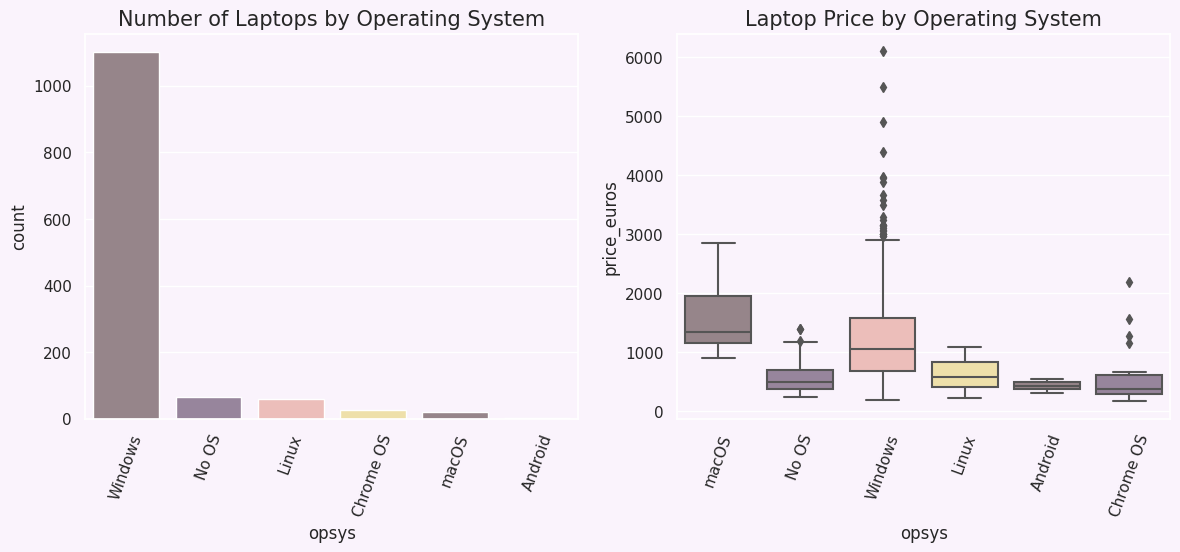

In [40]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)
sns.countplot(x="opsys",ax=axes[0],palette=pallet,data=df,
              order=df["opsys"].value_counts().index)
sns.boxplot(x ="opsys",y ='price_euros' ,palette=pallet,ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by Operating System",fontsize=15)
axes[1].set_title("Laptop Price by Operating System",fontsize=15)
plt.show()

- Intel is the most common CPU brand and the most expensive. AMD comes in second place with a big difference.
- Intel ( Core i5 7200U, Core i7 7700HQ, Core i7 7500U) are the most frequent CPUs type.
- Intel is the most frequent GPU brand, then Nvidia and AMD are the least frequent.
- Intel (HD Graphics 620 and HD Graphics 520) are the most frequent GPU type.
- Nvidia is the most expensive GPU, and AMD is the cheapest.
- The number of laptops with AMD CPUs equals the number of laptops with AMD GPUs because laptops with AMD CPUs also have AMD GPUs.
- We have 5 operating systems Windows, Mac, Chrome, Linux, and Android.
- Also we have laptops with no operating systems(No OS)
- Laptops with the Mac operating system have the highest average price, and laptops with Linux have the lowest.
- There is one laptop with ARM GPU brand and Samsung CPU brand, I will drop it.

In [41]:
df[df["gpu_brand"]!="ARM"]

,company,product,typename,inches,cpu,ram,gpu,opsys,weight,price_euros,resolution,touch_screen,IPS Panel_screen,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,NO,Yes,2.3,Intel,SSD,None,128.0,0.0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NO,No,1.8,Intel,Flash Storage,None,128.0,0.0,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NO,No,2.5,Intel,SSD,None,256.0,0.0,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,NO,Yes,2.7,Intel,SSD,None,512.0,0.0,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,NO,Yes,3.1,Intel,SSD,None,256.0,0.0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,1920x1080,Yes,Yes,2.5,Intel,SSD,None,128.0,0.0,Intel
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,3200x1800,Yes,Yes,2.5,Intel,SSD,None,512.0,0.0,Intel
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,1366x768,NO,No,1.6,Intel,Flash Storage,None,64.0,0.0,Intel
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,1366x768,NO,No,2.5,Intel,HDD,None,1000.0,0.0,AMD


## Weight , Screen Size and Screen Resolution

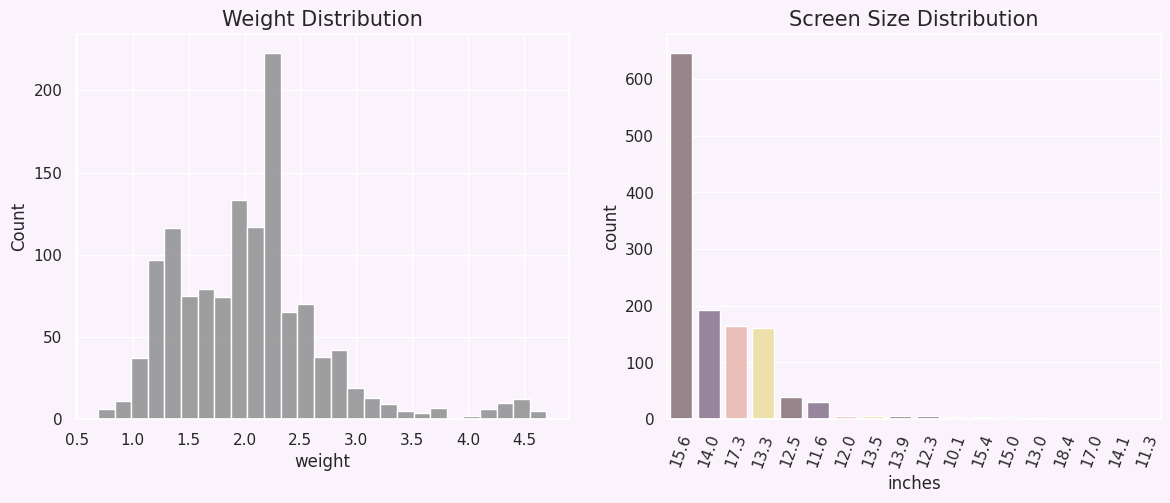

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.histplot(x="weight",ax=axes[0],color="grey",data=df)
sns.countplot(x="inches",ax=axes[1],palette=pallet,
              order=df["inches"].value_counts().index,data=df)
plt.xticks(rotation=70) 
axes[0].set_title("Weight Distribution",fontsize=15)
axes[1].set_title("Screen Size Distribution",fontsize=15)

plt.show()

- More than half of the laptop's screens are 15.6 inches.
- [15.6,17.3,14,13.3,12.5,11.6] are the screen size for most laptops .
- [2.20,2.20,2.00,2.4,2.5] are the top frequent weights ,most of laptops weight distributed between 1.3 and 2.5 .

In [43]:
screen_size = [15.6,17.3,14,13.3,12.5,11.6]
df=df[df["inches"].isin(screen_size)]

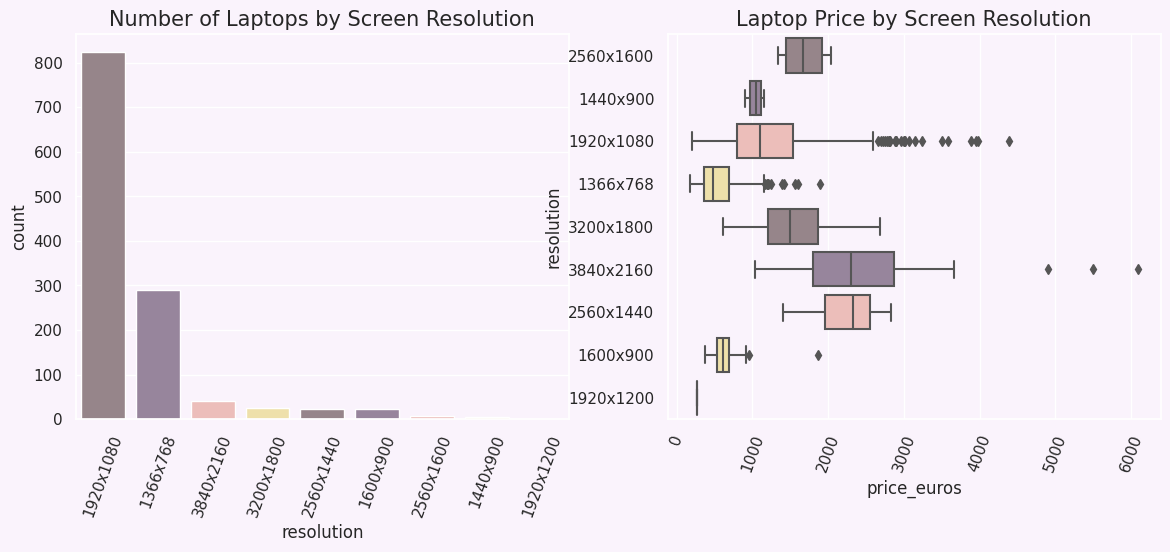

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="resolution",ax=axes[0],palette=pallet,
              order=df["resolution"].value_counts().index,data=df)
sns.boxplot(x ='price_euros',y ="resolution",ax=axes[1],palette=pallet,data = df)
axes[0].set_title("Number of Laptops by Screen Resolution",fontsize=15)
axes[1].set_title("Laptop Price by Screen Resolution",fontsize=15)

plt.show()

- We have 15 different resolutions. 
- 1920x1080 is the most common screen resolution in the dataset with an average price of 1224.799 euros
- 1366x768 is the worst resolution with the lowest price on average.

## RAM and Hard Drive

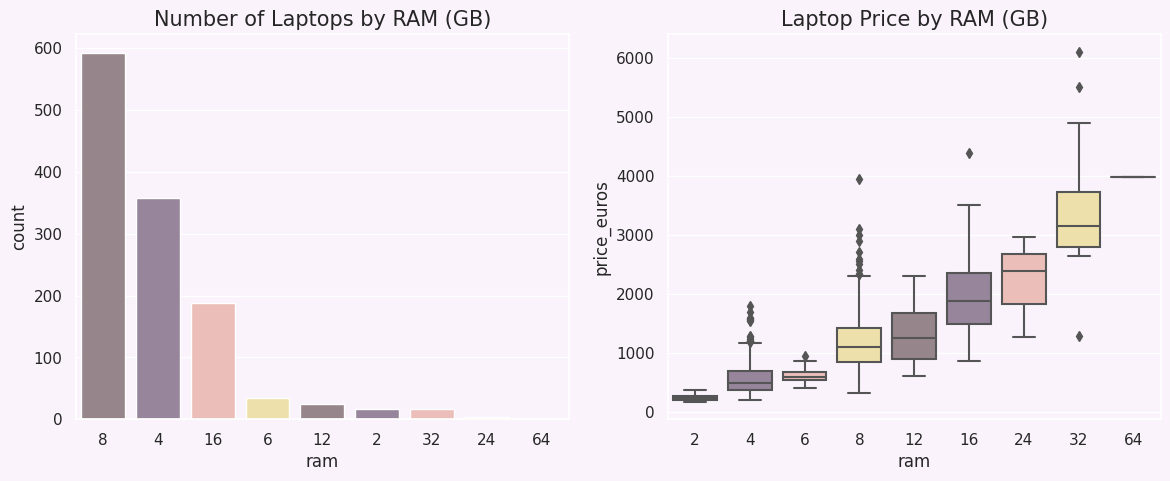

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
   # plt.xticks(rotation=70)

sns.countplot(x="ram",ax=axes[0],palette=pallet,
              order=df["ram"].value_counts().index,data=df)
sns.boxplot(x ="ram",y ="price_euros" ,palette=pallet,data = df)

axes[0].set_title("Number of Laptops by RAM (GB)",fontsize=15)
axes[1].set_title("Laptop Price by RAM (GB)",fontsize=15)

plt.show()

- The memory range from 8 GB to 64 GB. The most frequent memory is 8 GB
- There is an obvious relationship between the RAM and the price, the price increases when the RAM Increases

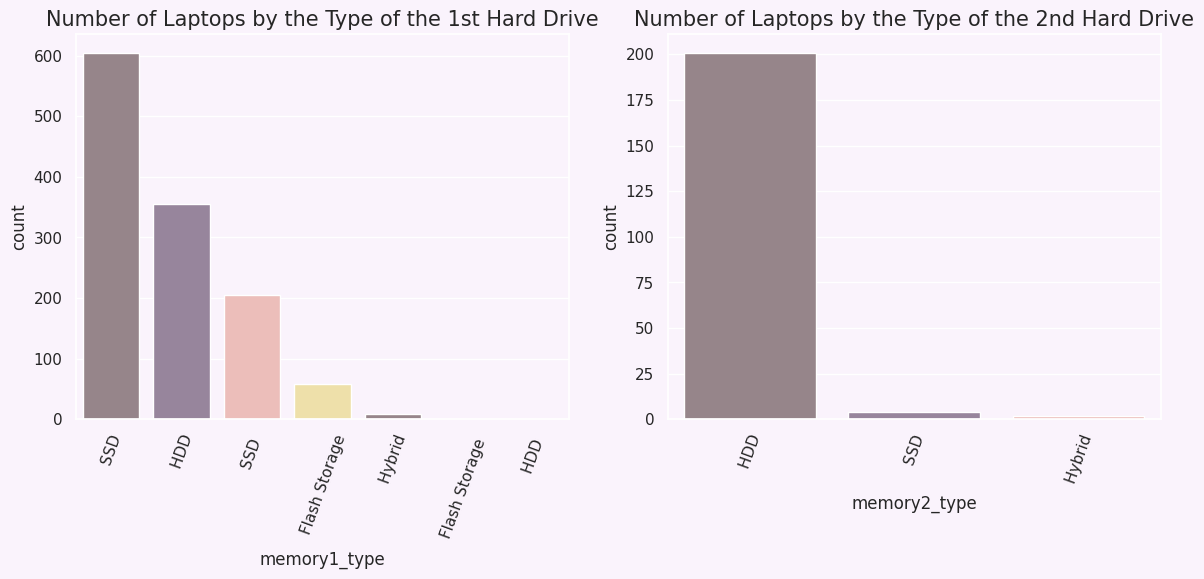

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="memory1_type",ax=axes[0],
              order=df["memory1_type"].value_counts().index,palette=pallet,
              data=df)
sns.countplot(x="memory2_type",ax=axes[1],
              order=df["memory2_type"].value_counts().index,palette=pallet,
              data=df)

axes[0].set_title("Number of Laptops by the Type of the 1st Hard Drive",fontsize=15)
axes[1].set_title("Number of Laptops by the Type of the 2nd Hard Drive",fontsize=15)

plt.show()

- We only have 3 laptops that have 24 RAM and 1 laptop that has 64 RAM, I will drop them.

In [47]:
df[df["ram"].isin([24,64]) == False]

,company,product,typename,inches,cpu,ram,gpu,opsys,weight,price_euros,resolution,touch_screen,IPS Panel_screen,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,NO,Yes,2.3,Intel,SSD,None,128.0,0.0,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NO,No,1.8,Intel,Flash Storage,None,128.0,0.0,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NO,No,2.5,Intel,SSD,None,256.0,0.0,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,NO,Yes,3.1,Intel,SSD,None,256.0,0.0,Intel
5,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows,2.10,400.00,1366x768,NO,No,NaN,AMD,HDD,None,500.0,0.0,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,1920x1080,Yes,Yes,2.5,Intel,SSD,None,128.0,0.0,Intel
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,3200x1800,Yes,Yes,2.5,Intel,SSD,None,512.0,0.0,Intel
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,1366x768,NO,No,1.6,Intel,Flash Storage,None,64.0,0.0,Intel
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,1366x768,NO,No,2.5,Intel,HDD,None,1000.0,0.0,AMD


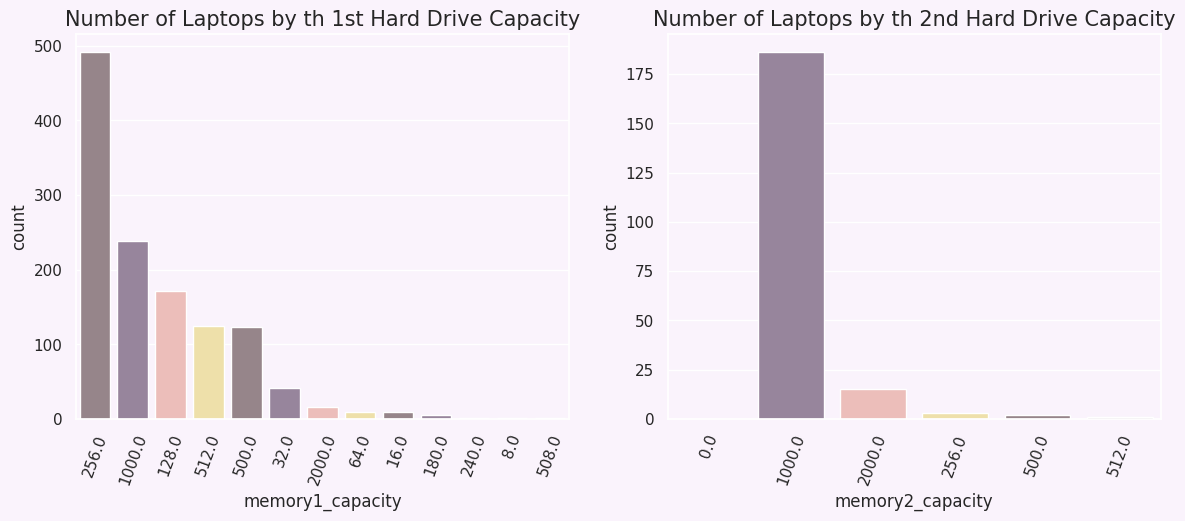

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="memory1_capacity",ax=axes[0],
              order=df["memory1_capacity"].value_counts().index,
              palette=pallet,data=df)
sns.countplot(x="memory2_capacity",ax=axes[1],
              order=df["memory2_capacity"].value_counts().index,
              palette=pallet,data=df[df["memory2_capacity"]!=0])

axes[0].set_title("Number of Laptops by th 1st Hard Drive Capacity",fontsize=15)
axes[1].set_title("Number of Laptops by th 2nd Hard Drive Capacity",fontsize=15)

plt.show()

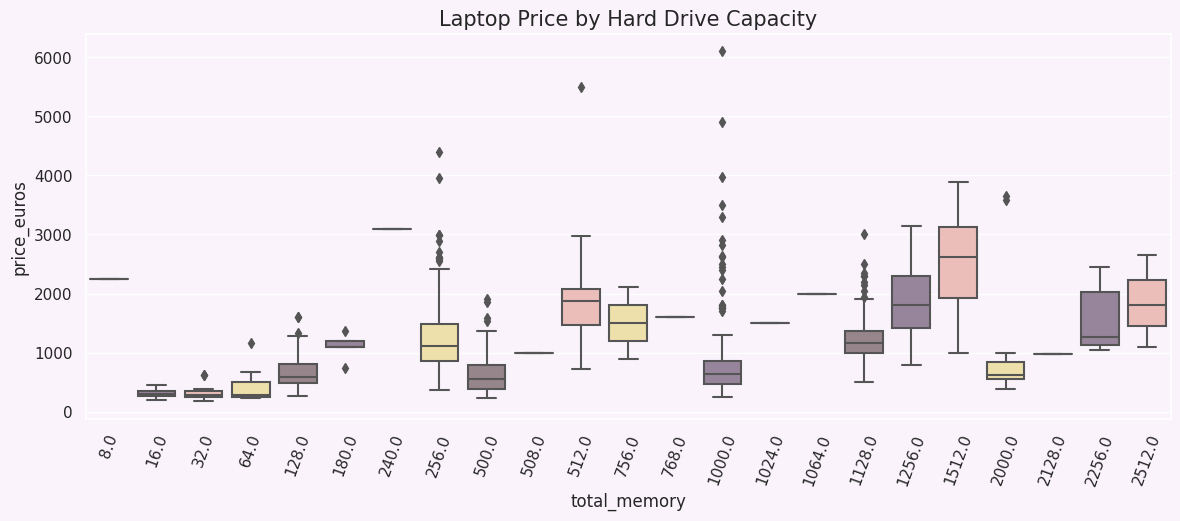

In [49]:
df["total_memory"]=df["memory1_capacity"]+df["memory2_capacity"]
sns.boxplot(x ="total_memory",y ="price_euros" ,palette=pallet,data = df)
plt.xticks(rotation=70)
plt.title("Laptop Price by Hard Drive Capacity",fontsize=15)
plt.show()

- We have 180 laptops with 2 hard drives.
- The most frequent type for the first hard drive is SSD with 256 GB.
- The most frequent type for the second hard drive is HDD with 1000 GB.
- The second hard drive usually has high capacity.
- The hard drive capacity affects the price, but the relationship between the two variables doesn't seem very strong

## Model Building

In [50]:
df_model=df.copy()

In [51]:
df_model

,company,product,typename,inches,cpu,ram,gpu,opsys,weight,price_euros,...,touch_screen,IPS Panel_screen,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity,gpu_brand,total_memory
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,...,NO,Yes,2.3,Intel,SSD,None,128.0,0.0,Intel,128.0
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,...,NO,No,1.8,Intel,Flash Storage,None,128.0,0.0,Intel,128.0
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,...,NO,No,2.5,Intel,SSD,None,256.0,0.0,Intel,256.0
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,...,NO,Yes,3.1,Intel,SSD,None,256.0,0.0,Intel,256.0
5,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4,AMD Radeon R5,Windows,2.10,400.00,...,NO,No,NaN,AMD,HDD,None,500.0,0.0,AMD,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows,1.80,638.00,...,Yes,Yes,2.5,Intel,SSD,None,128.0,0.0,Intel,128.0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows,1.30,1499.00,...,Yes,Yes,2.5,Intel,SSD,None,512.0,0.0,Intel,512.0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows,1.50,229.00,...,NO,No,1.6,Intel,Flash Storage,None,64.0,0.0,Intel,64.0
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows,2.19,764.00,...,NO,No,2.5,Intel,HDD,None,1000.0,0.0,AMD,1000.0


In [52]:
col_to_encode=['company', 'product', 'typename','opsys','gpu','cpu',
               'resolution','touch_screen','IPS Panel_screen','memory1_type', 
               'memory2_type','cpu_brand','gpu_brand']

In [53]:
#Label encoding
encoder = LabelEncoder()
for col in col_to_encode:
    df_model[col] = encoder.fit_transform(df_model[col])

In [91]:
X=df_model.drop('price_euros', axis = 1)
y=np.log(df_model['price_euros'])

In [92]:
X = np.nan_to_num(X) 

In [56]:
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [57]:
#lr=LinearRegression()
#lr.fit(X_train,y_train)
#lr.score(X_test,y_test)

In [58]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(), 
            'params': {
                'normalize': [True, False] 
                }
                 },
        'lasso': {
            'model': Lasso(), 
            'params': { 
                'alpha': [1,2], 
                'selection': ['random', 'cyclic']
                }
                },
        'Random_forest': {
            'model':RandomForestRegressor(), 
            'params' :{
                'n_estimators' : [64, 100, 125],
                'max_depth':[10, 30, 50],
                'max_features':[10,15,20]
                }
                },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'], 
                'splitter': ['best','random']
                }
                }
             }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [61]:
#find_best_model_using_gridsearchcv(X,y)

## Regression Model

- Time to do some regression. We will try to predict the Price_euros column using some of the other columns. Because this dataset is very small, I will only use classical ML algorithms and forgo fancy neural networks.

- Additionally, since this dataset is so small, I will be using K-fold cross validation

In [83]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import cross_val_score

- define the pipelines. I use a log transform here because the Price_euros is heavily skewed to the right, so doing this makes the distribution more symmetrical, which enables ML models to perform better.

In [84]:
# np.log1p takes the natural log, and adds 1 to avoid taking the log of 0 
log_transform = FunctionTransformer(np.log1p, validate=True)

models = [
    ("linear_regression", LinearRegression()),
    ("sgd_regression", SGDRegressor()),
    ("decision_tree_regressor", DecisionTreeRegressor()),
    ("random_forest_regressor", RandomForestRegressor()),
    ("support_vector_regressor", SVR())
]

model_cross_vals = []

for model in models:
    pipeline = Pipeline([
        ("log_transform", log_transform),
        model
    ])
    scores = cross_val_score(pipeline, X, y, cv=5)
    model_cross_vals.append((model[0], scores))

In [87]:
for model in model_cross_vals:
    print(f"Model:{model[0]}, Mean CV Score: {model[1].mean()}")

Model:linear_regression, Mean CV Score: 0.7221681232770273
Model:sgd_regression, Mean CV Score: 0.5666158402207989
Model:decision_tree_regressor, Mean CV Score: 0.7657747891940053
Model:random_forest_regressor, Mean CV Score: 0.8884662096797097
Model:support_vector_regressor, Mean CV Score: 0.7524230434145215


- Looking at the above results, both the decision tree and random forest probably overfit to the data. The support vector regressor didn't even crack 5%.